# Modelo de Clasificación de Comentarios de Reddit

Este notebook implementa un modelo random forest para clasificar comentarios basado en el analisis de sentimientos

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Carga de datos preprocesados

In [2]:
df = pd.read_csv("data/processed/comments_lang_en.csv")

## Parametros

In [3]:
# Lista de palabras ofensivas
bad_words = [
    "idiot", "stupid", "moron", "hate", "trash", "kill", "fuck", "dumb",
    "loser", "shut up", "disgusting", "ugly", "worthless", "pathetic",
    "suck", "annoying", "nonsense", "fool", "jerk", "bastard", "crap", "damn"
]

def pseudo_label(text):
    text = str(text).lower()
    return 1 if any(bad in text for bad in bad_words) else 0

df["target"] = df["text_ml"].apply(pseudo_label)

## Features TF-IDF + VADER

In [4]:
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df["text_ml"].fillna(""))

vader_feats = df[["vader_neg", "vader_neu", "vader_pos", "vader_compound"]].fillna(0).values
X = np.hstack((X_tfidf.toarray(), vader_feats))
y = df["target"]

## Split de Entrenamiento y Pruebas

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelo Random Forest

In [6]:
model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Resultados

In [7]:
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2537
           1       1.00      0.35      0.52        95

    accuracy                           0.98      2632
   macro avg       0.99      0.67      0.75      2632
weighted avg       0.98      0.98      0.97      2632



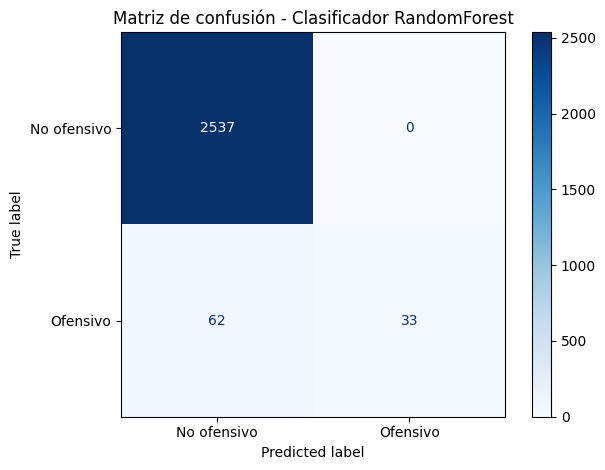

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No ofensivo","Ofensivo"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Clasificador RandomForest")
plt.tight_layout()
plt.savefig("data/processed/figs/confusion_matrix.png", dpi=150)
plt.show()